The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
7 images available.
{u'bands': [{u'crs': u'EPSG:26910', u'crs_transform': [1.0, 0.0, 594700.0, 0.0, -1.0, 4054180.0], u'id': u'R', u'data_type': {u'max': 255, u'type': u'PixelType', u'precision': u'int', u'min': 0}, u'dimensions': [6290, 7620]}, {u'crs': u'EPSG:26910', u'crs_transform': [1.0, 0.0, 594700.0, 0.0, -1.0, 4054180.0], u'id': u'G', u'data_type': {u'max': 255, u'type': u'PixelType', u'precision': u'int', u'min': 0}, u'dimensions': [6290, 7620]}, {u'crs': u'EPSG:26910', u'crs_transform': [1.0, 0.0, 594700.0, 0.0, -1.0, 4054180.0], u'id': u'B', u'data_type': {u'max': 255, u'type': u'PixelType', u'precision': u'int', u'min': 0}, u'dimensions': [6290, 7620]}, {u'crs': u'EPSG:26910', u'crs_transform': [1.0, 0.0, 594700.0, 0.0, -1.0, 4054180.0], u'id': u'N', u'data_type': {u'max': 255, u'type': u'PixelType', u'precision': u'int', u'min': 0}, u'dimensions': [6290, 7620]}], u'version': 14056513919

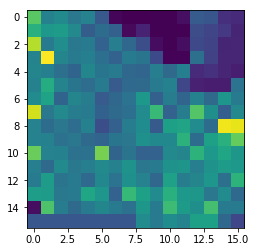

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pprint
pp = pprint.PrettyPrinter(indent=4)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ee

# import my custom library of helper functions
from gee_library import *

ee.Initialize()

monterey = (-121.8905502, 36.5966087)

california_bounds = bound_geometry(
                        (-121.6088395, 36.6240228),
                        (-121.6088395, 36.6240228)
                    )


maps_collection = ee.ImageCollection('USDA/NAIP/DOQQ')

# print available_bands(maps_collection)


monterey_images = all_images_at_location(maps_collection, monterey)


# bound_filter = ee.Filter.geometry(california_bounds)
# greater_monterey_area = maps_collection.filter(bound_filter)


print collection_length(monterey_images), "images available."

# get_region(maps_collection, 600, 'N', california_bounds)



# print "Bands available:", available_bands(greater_monterey_area)

# print date_range(monterey_images)

print monterey_images.first().getInfo()

for z in [500]:
    
    tiles =  element_to_img(monterey_images.first(), z, ['N'], california_bounds)

    for t in tiles:
        img=mpimg.imread(t)
        plt.imshow(img)
        plt.show()





In [40]:
small_bounds_str = bound_string(
                        (-121.800998,  36.4983511),
                        (-121.7831844, 36.4789145)
                    )


path=ee.Image(maps_collection.mosaic()).getDownloadUrl({
        'scale': 900,                              # resolution in meters
        'crs': 'EPSG:4326', #4326                         #  projection
        'bands': [{'id': 'R'}],
        'region': small_bounds_str
        });

# debug output
print path

https://earthengine.googleapis.com/api/download?docid=aef810413319ff70048faa1e8c8cce66&token=fe31fdb25fa312df2057385a27f02a9d
